# Vizailization will be created here

> Viz notebook

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#| default_exp viz_utils

In [64]:
#| export
import cv2
from pathlib import Path
import numpy as np
from fastcore.all import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import binary_dilation, binary_erosion
import matplotlib.patches as patches
import matplotlib as mpl

In [17]:
mpl.rcParams['image.cmap'] = 'gray'

In [18]:
#| export
get_name = np.vectorize(lambda x: Path(x).name)

In [19]:
Path.home()

Path('/home/hasan')

In [20]:
im_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/')
mask_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks/')
#im_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_images/')
#mask_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_masks')

images=im_path.ls()
masks=mask_path.ls()    

In [21]:
r_idx = np.random.choice(len(im_path.ls()), 1)[0]

In [22]:
s_img = images[r_idx]
s_msk = masks[r_idx]

In [23]:
s_img.name, s_msk.name

('img_21_p_3.png', 'img_21_p_3.png')

In [24]:
sn_msk_img = cv2.imread(str(s_msk), cv2.IMREAD_GRAYSCALE)
np.unique(sn_msk_img)

array([  0, 255], dtype=uint8)

In [25]:
#| export
def overlay_mask(
        im_path, 
        msk_path, 
        overlay_clr=(0, 1, 0),
        scale=1,
        alpha=0.5,
        ):
    'Creaete a overlay image from image and mask'
    # Read the grayscale image
    gray_img = cv2.imread(f'{im_path}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")

    # Read the mask image
    mask_img = cv2.imread(f'{msk_path}', cv2.IMREAD_GRAYSCALE)
    mask_img = mask_img.astype(bool)
    if mask_img is None:
        raise ValueError("Could not read the mask image")

    # Check if dimensions of both images are the same
    if gray_img.shape != mask_img.shape:
        raise ValueError("Dimensions of grayscale image and mask do not match")

    # Convert image to 3 channels
    rgb_img = np.stack([gray_img]*3, axis=-1)/255
    fig, ax = plt.subplots()
    ax.imshow(rgb_img)

    clrd_overlay = np.zeros_like(rgb_img)
    clrd_overlay[mask_img]=overlay_clr
    ax.imshow(clrd_overlay, alpha=alpha)





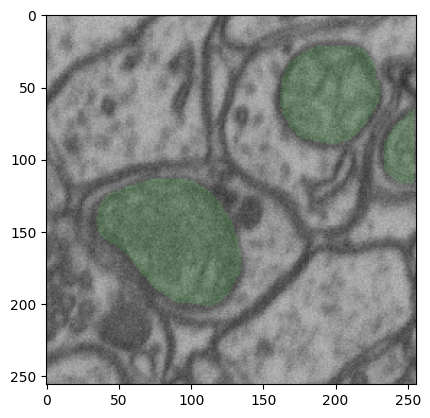

In [26]:
overlay_mask(s_img, s_msk,alpha=0.1)

In [27]:
#| export
def overlay_mask_border_on_image(im_path, msk_path, border_color=(0, 1, 0), border_width=1):
    """
    Overlays the border of a binary mask on a grayscale image and displays the result using matplotlib.
    
    Args:
    image (numpy.ndarray): Grayscale image.
    mask (numpy.ndarray): Binary mask of the same size as the image.
    border_color (tuple): RGB color for the mask border in the range [0, 1].
    border_width (int): Width of the border.
    
    Returns:
    None: The function displays a plot.
    """
    gray_img = cv2.imread(f'{im_path}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")

    # Read the mask image
    mask_img = cv2.imread(f'{msk_path}', cv2.IMREAD_GRAYSCALE)
    mask_img = mask_img.astype(bool)
    if mask_img is None:
        raise ValueError("Could not read the mask image")

    # Check if dimensions of both images are the same
    if gray_img.shape != mask_img.shape:
        raise ValueError("Dimensions of grayscale image and mask do not match")
    # Ensure the mask is boolean

    # Find the borders of the mask
    dilated_mask = binary_dilation(mask_img, iterations=border_width)
    eroded_mask = binary_erosion(mask_img, iterations=border_width)
    border = dilated_mask & ~eroded_mask

    # Convert grayscale image to RGB
    rgb_image = np.stack([gray_img]*3, axis=-1) / 255.0  # Normalize for matplotlib

    # Apply the colored border
    rgb_image[border] = border_color

    # Display the image using matplotlib
    plt.imshow(rgb_image, cmap='gray')
    plt.axis('off')  # Turn off axis numbers
    plt.show()



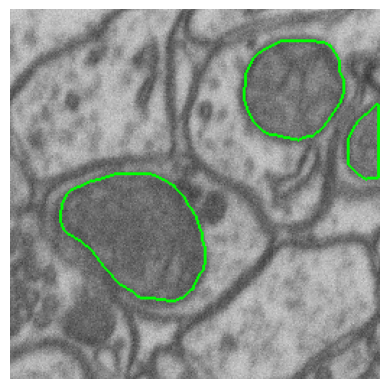

In [28]:

overlay_mask_border_on_image(s_img, s_msk)

In [31]:
#yolo_mask_path = Path(r'/home/hasan/workspace/data/microscopy_data/yolo_dataset_train')
#im_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_images/')
yolo_mask_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train')
im_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/')
yolo_mask_path.ls(), im_path.ls()

((#1633) [Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_139_p_11.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_48_p_0.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_120_p_1.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_54_p_9.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_2_p_2.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_34_p_10.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_50_p_1.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_42_p_8.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_67_p_1.txt'),Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_20_p_1.txt')...],
 (#1642) [Path('/home/hasan/Schreibtisch/projects/data/microsc

In [41]:

r_idx = np.random.choice(len(im_path.ls()), 1)[0]
print(f'random index: {r_idx}')

random index: 546


In [42]:
yolo_mask_path.ls()[r_idx], im_path.ls()[r_idx]

(Path('/home/hasan/Schreibtisch/projects/data/microscopy/yolo_dataset_train/img_27_p_0.txt'),
 Path('/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/img_73_p_6.png'))

In [106]:
#| export
def overlay_yolo_mask(
        im_path, 
        msk_path, 
        color=None, # color values other matplotlib colors
        idx=None, # Index of image in the folder other random will be chosen
        im_name=None, # Imge name with extension
        fill=False, # whther to fill the mask or not
        alpha=0.3 # alpha value for the mask for transparency
        ):
    'Creaete a overlay image from image and mask'


    im_idx = idx if idx is not None else np.random.choice(len(im_path.ls()), 1)[0]
    im_name = im_name if im_name is not None else im_path.ls()[im_idx].name
    mask_name = f'{msk_path}/{im_name}'.replace('png', 'txt')



    # Read the grayscale image
    gray_img = cv2.imread(f'{im_path}/{im_name}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")
    if color is None:
        colors = mpl.colormaps.get_cmap('tab10')



    # Convert image to 3 channels
    rgb_img = np.stack([gray_img]*3, axis=-1)

    image_h, image_w, _ = rgb_img.shape
    fig, ax = plt.subplots()
    ax.imshow(rgb_img)

    with open(f'{mask_name}', 'r') as f:
        for line in f:
            parts = line.strip().split()
            category_id = int(parts[0])
            color = colors(category_id  %10) if color is None else color

            polygon = [float(coord) for coord in parts[1:]]
            polygon = np.array(polygon).reshape(-1, 2) * np.array([image_w, image_h])
            patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=fill, alpha=alpha, linewidth=3)
            ax.add_patch(patch)
    plt.axis('off')
    plt.title('Image with mask')
    plt.show()

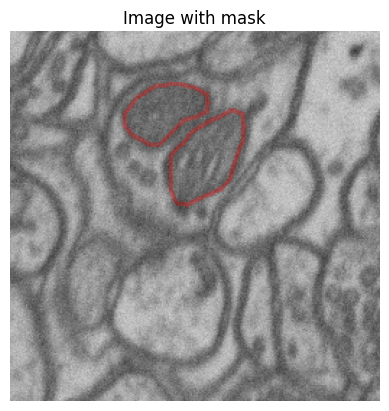

In [107]:
overlay_yolo_mask(im_path, msk_path=yolo_mask_path, color='red', fill=False)

In [108]:
#| hide
import nbdev; nbdev.nbdev_export()